# Deep Convolutional GAN

Training Deep Convolutional Gan on the MNIST dataset

In [6]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.layers import Dense, Activation, ELU, BatchNormalization
import keras.backend as K
%matplotlib inline

## Grabbing MNIST dataset from keras

In [7]:
(X_train_dataset, y_train_dataset), (X_test_dataset, y_test_dataset) = keras.datasets.mnist.load_data()

### Preprocess and deprocess functions

In [8]:
def preprocess(x):
    x = np.float64(x)
    x = x.reshape(-1,28,28,1)
    x = 2 * (x / 255 - 0.5)
    x = np.clip(x, -1, 1)
    return x

def deprocess(x):
    x = 255 * (x / 2 + 1)
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

#preprocess
X_train_dataset = np.float64(X_train_dataset)
X_train_dataset = X_train_dataset.reshape(-1, 28, 28, 1)
X_train_dataset = (X_train_dataset / 255 - 0.5) * 2
X_train_dataset = np.clip(X_train_dataset, -1, 1)

X_test_dataset = preprocess(X_test_dataset)

## Model Definition

In [9]:
def toggle_train(m, b):
    for l in m.layers:
        l.trainable = b

def create_gen(size, alpha):
    return Sequential([
        Dense(784, input_shape=(size, )),
        Reshape(target_shape=(7,7,16)),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Conv2DTranspose(32, kernel_size=5, strides=2, padding='same'),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Conv2DTranspose(1, kernel_size=5, strides=2, padding='same'),
        Activation('tanh')
    ])

def create_disc(alpha):
    return Sequential([
        Conv2D(32, kernel_size=5, strides=2, padding='same', input_shape=(28,28,1)),
        ELU(alpha=alpha),
        Conv2D(16, kernel_size=5, strides=2, padding='same'),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Flatten(),
        Dense(784),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Dense(1),
        Activation('sigmoid')
        
    ])

def make_Dc_GAN():
    size = 100 
    alpha = 0.2
    beta = 0.9
    gen_lr = 0.0001
    disc_lr = 0.001
    gen = create_gen(size, alpha)
    disc = create_disc(alpha)
    
    disc.compile(optimizer=Adam(lr=disc_lr, beta_1=beta), loss='binary_crossentropy')
    gan = Sequential([
        gen, disc
    ])
    gan.compile(optimizer=Adam(lr=gen_lr, beta_1=beta), loss='binary_crossentropy')
    return gan, disc, gen
    

## Creating real and fake labels and the GAN model

In [10]:
label_train_real = np.ones([128,1])
label_train_fake = np.zeros([128,1])

label_eval_real = np.ones([16,1])
label_eval_fake = np.zeros([16,1])

gan, disc, gen = make_Dc_GAN()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Training Gan on 100 epochs with batch size 128

/Users/Kelvin/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


On Epoch: 1/100 Discriminator Loss: 4.810307025909424 Generator Loss: 5.7595438957214355
On Epoch: 2/100 Discriminator Loss: 2.2910208702087402 Generator Loss: 2.257227897644043
On Epoch: 3/100 Discriminator Loss: 3.3863887786865234 Generator Loss: 3.3194518089294434
On Epoch: 4/100 Discriminator Loss: 2.8292932510375977 Generator Loss: 2.386765480041504
On Epoch: 5/100 Discriminator Loss: 2.0715584754943848 Generator Loss: 2.096045970916748
On Epoch: 6/100 Discriminator Loss: 4.700742244720459 Generator Loss: 4.365784168243408
On Epoch: 7/100 Discriminator Loss: 6.299193382263184 Generator Loss: 7.586021423339844
On Epoch: 8/100 Discriminator Loss: 3.115398645401001 Generator Loss: 3.2052228450775146
On Epoch: 9/100 Discriminator Loss: 1.7801015377044678 Generator Loss: 1.3586161136627197
On Epoch: 10/100 Discriminator Loss: 4.117657661437988 Generator Loss: 4.444947719573975
Images on 10 epoch


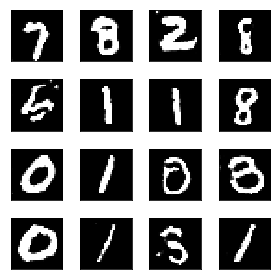

On Epoch: 11/100 Discriminator Loss: 5.2714009284973145 Generator Loss: 5.585155010223389
On Epoch: 12/100 Discriminator Loss: 2.1183922290802 Generator Loss: 3.000204086303711
On Epoch: 13/100 Discriminator Loss: 1.536634922027588 Generator Loss: 1.357208251953125
On Epoch: 14/100 Discriminator Loss: 3.4909286499023438 Generator Loss: 3.994091749191284
On Epoch: 15/100 Discriminator Loss: 3.6572017669677734 Generator Loss: 4.082436561584473
On Epoch: 16/100 Discriminator Loss: 3.214446544647217 Generator Loss: 2.786278247833252
On Epoch: 17/100 Discriminator Loss: 1.8918858766555786 Generator Loss: 2.1108198165893555
On Epoch: 18/100 Discriminator Loss: 3.5372371673583984 Generator Loss: 4.271059989929199
On Epoch: 19/100 Discriminator Loss: 2.8817126750946045 Generator Loss: 4.082065582275391
On Epoch: 20/100 Discriminator Loss: 4.404916763305664 Generator Loss: 5.3383073806762695
Images on 20 epoch


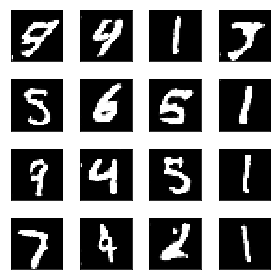

On Epoch: 21/100 Discriminator Loss: 1.7109148502349854 Generator Loss: 2.6296656131744385
On Epoch: 22/100 Discriminator Loss: 6.354581832885742 Generator Loss: 5.614024639129639
On Epoch: 23/100 Discriminator Loss: 2.979644775390625 Generator Loss: 3.4302539825439453
On Epoch: 24/100 Discriminator Loss: 3.8091251850128174 Generator Loss: 3.1382479667663574
On Epoch: 25/100 Discriminator Loss: 4.770084857940674 Generator Loss: 4.870487213134766
On Epoch: 26/100 Discriminator Loss: 2.003791093826294 Generator Loss: 1.8174192905426025
On Epoch: 27/100 Discriminator Loss: 5.031608581542969 Generator Loss: 1.2474421262741089
On Epoch: 28/100 Discriminator Loss: 3.4634647369384766 Generator Loss: 3.2378487586975098
On Epoch: 29/100 Discriminator Loss: 6.502721786499023 Generator Loss: 3.638911247253418
On Epoch: 30/100 Discriminator Loss: 4.5259552001953125 Generator Loss: 4.671666145324707
Images on 30 epoch


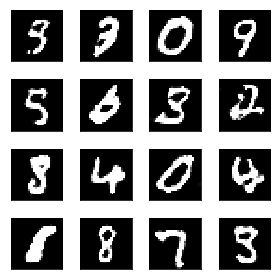

On Epoch: 31/100 Discriminator Loss: 3.598999261856079 Generator Loss: 3.894749164581299
On Epoch: 32/100 Discriminator Loss: 2.8886404037475586 Generator Loss: 3.4357123374938965
On Epoch: 33/100 Discriminator Loss: 3.543353796005249 Generator Loss: 4.2366180419921875
On Epoch: 34/100 Discriminator Loss: 5.106691837310791 Generator Loss: 5.747397422790527
On Epoch: 35/100 Discriminator Loss: 1.7264761924743652 Generator Loss: 2.2314558029174805
On Epoch: 36/100 Discriminator Loss: 3.7176332473754883 Generator Loss: 4.242854118347168
On Epoch: 37/100 Discriminator Loss: 2.2139830589294434 Generator Loss: 3.017744541168213
On Epoch: 38/100 Discriminator Loss: 2.462188243865967 Generator Loss: 2.3636162281036377
On Epoch: 39/100 Discriminator Loss: 3.2419965267181396 Generator Loss: 4.097724914550781
On Epoch: 40/100 Discriminator Loss: 1.3084938526153564 Generator Loss: 1.5106278657913208
Images on 40 epoch


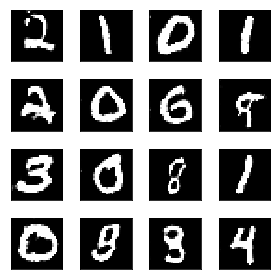

On Epoch: 41/100 Discriminator Loss: 2.9852542877197266 Generator Loss: 1.840795636177063
On Epoch: 42/100 Discriminator Loss: 1.5707423686981201 Generator Loss: 1.9345252513885498
On Epoch: 43/100 Discriminator Loss: 5.343791484832764 Generator Loss: 6.607631683349609
On Epoch: 44/100 Discriminator Loss: 2.6655147075653076 Generator Loss: 2.619520902633667
On Epoch: 45/100 Discriminator Loss: 4.303072929382324 Generator Loss: 3.9679441452026367
On Epoch: 46/100 Discriminator Loss: 2.1111652851104736 Generator Loss: 2.1514079570770264
On Epoch: 47/100 Discriminator Loss: 6.043426990509033 Generator Loss: 0.9444282054901123
On Epoch: 48/100 Discriminator Loss: 4.299952983856201 Generator Loss: 5.629878997802734
On Epoch: 49/100 Discriminator Loss: 2.5149478912353516 Generator Loss: 2.5655131340026855
On Epoch: 50/100 Discriminator Loss: 2.4638874530792236 Generator Loss: 3.035771369934082
Images on 50 epoch


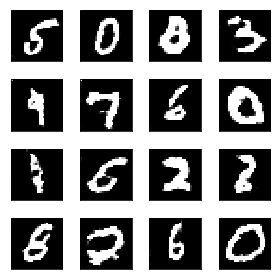

On Epoch: 51/100 Discriminator Loss: 5.627554416656494 Generator Loss: 5.8249359130859375
On Epoch: 52/100 Discriminator Loss: 1.9896025657653809 Generator Loss: 0.5866826772689819
On Epoch: 53/100 Discriminator Loss: 2.287947654724121 Generator Loss: 3.986908435821533
On Epoch: 54/100 Discriminator Loss: 3.0261380672454834 Generator Loss: 4.049859046936035
On Epoch: 55/100 Discriminator Loss: 5.521084785461426 Generator Loss: 5.207607269287109
On Epoch: 56/100 Discriminator Loss: 6.492578506469727 Generator Loss: 7.113364219665527
On Epoch: 57/100 Discriminator Loss: 3.5023627281188965 Generator Loss: 5.957144260406494
On Epoch: 58/100 Discriminator Loss: 2.5528461933135986 Generator Loss: 3.142848491668701
On Epoch: 59/100 Discriminator Loss: 2.5163378715515137 Generator Loss: 2.636608362197876
On Epoch: 60/100 Discriminator Loss: 2.407592296600342 Generator Loss: 2.188772678375244
Images on 60 epoch


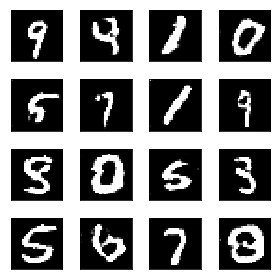

On Epoch: 61/100 Discriminator Loss: 3.340385913848877 Generator Loss: 3.6715264320373535
On Epoch: 62/100 Discriminator Loss: 4.090734481811523 Generator Loss: 4.543160438537598
On Epoch: 63/100 Discriminator Loss: 2.6272263526916504 Generator Loss: 4.34966516494751
On Epoch: 64/100 Discriminator Loss: 3.6500651836395264 Generator Loss: 3.4454023838043213
On Epoch: 65/100 Discriminator Loss: 8.007431983947754 Generator Loss: 8.233125686645508
On Epoch: 66/100 Discriminator Loss: 1.7547744512557983 Generator Loss: 2.7466278076171875
On Epoch: 67/100 Discriminator Loss: 5.970330238342285 Generator Loss: 6.774385929107666
On Epoch: 68/100 Discriminator Loss: 3.3372533321380615 Generator Loss: 4.958054542541504
On Epoch: 69/100 Discriminator Loss: 5.82098913192749 Generator Loss: 5.061905860900879
On Epoch: 70/100 Discriminator Loss: 2.7953572273254395 Generator Loss: 3.943809747695923
Images on 70 epoch


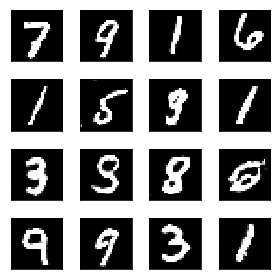

On Epoch: 71/100 Discriminator Loss: 3.5837414264678955 Generator Loss: 5.163167476654053
On Epoch: 72/100 Discriminator Loss: 7.55666971206665 Generator Loss: 6.993042945861816
On Epoch: 73/100 Discriminator Loss: 3.935124158859253 Generator Loss: 5.555270671844482
On Epoch: 74/100 Discriminator Loss: 7.040297508239746 Generator Loss: 8.763009071350098
On Epoch: 75/100 Discriminator Loss: 4.6621904373168945 Generator Loss: 4.340622901916504
On Epoch: 76/100 Discriminator Loss: 5.342905044555664 Generator Loss: 6.028975486755371
On Epoch: 77/100 Discriminator Loss: 3.600775718688965 Generator Loss: 4.716368675231934
On Epoch: 78/100 Discriminator Loss: 8.309063911437988 Generator Loss: 8.744708061218262
On Epoch: 79/100 Discriminator Loss: 5.912127494812012 Generator Loss: 5.718715667724609
On Epoch: 80/100 Discriminator Loss: 4.496074676513672 Generator Loss: 5.5878825187683105
Images on 80 epoch


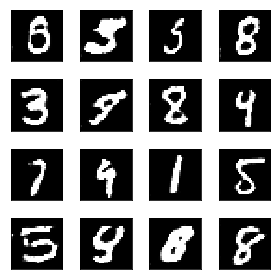

On Epoch: 81/100 Discriminator Loss: 4.893914699554443 Generator Loss: 4.915898323059082
On Epoch: 82/100 Discriminator Loss: 4.470059394836426 Generator Loss: 4.657045364379883
On Epoch: 83/100 Discriminator Loss: 8.185641288757324 Generator Loss: 8.703794479370117
On Epoch: 84/100 Discriminator Loss: 3.6433117389678955 Generator Loss: 4.0863037109375
On Epoch: 85/100 Discriminator Loss: 2.414165496826172 Generator Loss: 2.7025656700134277
On Epoch: 86/100 Discriminator Loss: 7.999090194702148 Generator Loss: 7.489152908325195
On Epoch: 87/100 Discriminator Loss: 5.362072944641113 Generator Loss: 5.62129020690918
On Epoch: 88/100 Discriminator Loss: 4.170936107635498 Generator Loss: 4.52359676361084
On Epoch: 89/100 Discriminator Loss: 8.7056303024292 Generator Loss: 8.710952758789062
On Epoch: 90/100 Discriminator Loss: 3.1168932914733887 Generator Loss: 4.082587242126465
Images on 90 epoch


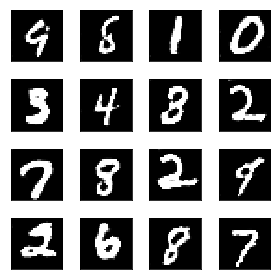

On Epoch: 91/100 Discriminator Loss: 3.6970279216766357 Generator Loss: 4.67298698425293
On Epoch: 92/100 Discriminator Loss: 3.299029588699341 Generator Loss: 4.892876625061035
On Epoch: 93/100 Discriminator Loss: 4.465854644775391 Generator Loss: 4.68748664855957
On Epoch: 94/100 Discriminator Loss: 4.387988567352295 Generator Loss: 4.7433881759643555
On Epoch: 95/100 Discriminator Loss: 3.567194700241089 Generator Loss: 3.7685694694519043
On Epoch: 96/100 Discriminator Loss: 4.782402038574219 Generator Loss: 5.374630928039551
On Epoch: 97/100 Discriminator Loss: 2.4514122009277344 Generator Loss: 2.22343111038208
On Epoch: 98/100 Discriminator Loss: 5.300114154815674 Generator Loss: 5.440078258514404
On Epoch: 99/100 Discriminator Loss: 5.186323642730713 Generator Loss: 6.106078147888184
On Epoch: 100/100 Discriminator Loss: 3.6369800567626953 Generator Loss: 4.515529632568359
Images on 100 epoch


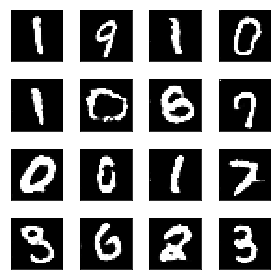

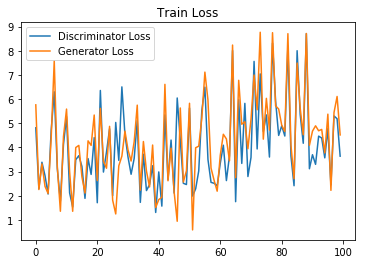

In [12]:
loss = []
for epochs in range(100):
    #
    for iterations in range(len(X_train_dataset)//128):
        X_batch_dataset = X_train_dataset[iterations * 128 : (iterations+1) * 128]
        #Create samples with a mean of 0 and S.D of 1
        random_set = np.random.normal(loc=0, scale=1, size=(128,100))
        X_batch_generated = gen.predict_on_batch(random_set)
        
        #Train disc
        toggle_train(disc, True)
        disc.train_on_batch(X_batch_dataset, label_train_real * (1-0.1))
        disc.train_on_batch(X_batch_generated, label_train_fake)
        
        #Train gen
        toggle_train(disc, False)
        gan.train_on_batch(random_set, label_train_real)
        
    X_eval_dataset = X_test_dataset[np.random.choice(len(X_test_dataset), 16, replace=False)]
    random_eval_set = np.random.normal(loc=0, scale=1, size=(16, 100))
    X_eval_generated = gen.predict_on_batch(random_eval_set)
    
    disc_loss = disc.test_on_batch(X_eval_dataset, label_eval_real)
    disc_loss += disc.test_on_batch(X_eval_generated, label_eval_fake)
    gan_loss = gan.test_on_batch(random_eval_set, label_eval_real)
    
    loss.append((disc_loss, gan_loss))
    
    print("On Epoch: {}/{} Discriminator Loss: {} Generator Loss: {}".format(epochs+1, 100, disc_loss, gan_loss))
    
    if (epochs+1)%10 == 0:
        print("Images on {} epoch".format(epochs+1))
        size = len(X_eval_generated)
        r = 4
        c = size//r
        plt.figure(figsize=(c, r))
        for i in range(size):
            img = deprocess(X_eval_generated[i])
            plt.subplot(r, c, i+1)
            plt.imshow(img, cmap='gray')
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()
loss = np.array(loss)
fig, ax = plt.subplots()
plt.plot(loss.T[0], label='Discriminator Loss')
plt.plot(loss.T[1], label='Generator Loss')
plt.title("Train Loss")
plt.legend()
plt.show()

